<a href="https://colab.research.google.com/github/namita0210/DataSciencePRojects/blob/main/topicModelling_LDA_chatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install faker

Imports


In [ ]:
import pandas as pd
import nltk
import random
from faker import Faker
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize # for this punctuation is required
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**<h1>Data with stop words and noise, created with prompt engineering**</h1><br>
generate a list of thirty made up problems that could occur while using the following applications

 *  slack
 *  ppt
 *  one drive
 *  share point <br>
in the form of a python dictionary
also include the following keys which should have values like those that are provided:
1. " number" : INC3422521
2."ci" : one drive, slack, ppt, share point
3. "week_start_date" : 2023-05-15
4. "description" : issue in managing file permission in one drive, this column must have some URLs, email ids, stopwords and other textual data which can be cleaned using NLP techniques

In [ ]:
import random
from faker import Faker

# Initialize the Faker generator
faker = Faker()

# List of possible application options
app_options = ["slack", "ppt", "one drive", "share point"]

# List of made-up problems
problem_descriptions = [
    "Messages are not syncing properly in Slack.",
    "PowerPoint application crashes when adding animations.",
    # ... (the rest of the problem descriptions)
    "Slack notifications are not being delivered to mobile devices.",
    "PPT animations are not playing during the slideshow."
]

# Generate a list of 100 dictionaries with random problems and other fixed values
data = []
for _ in range(100):
    app = random.choice(app_options)
    description = random.choice(problem_descriptions)
    description += f" More information can be found at {faker.url()}."  # Placeholder URL
    description += f" Contact us at {faker.email()} for assistance."  # Placeholder email ID
    data.append({
        "number": "INC3422521",
        "ci": app,
        "week_start_date": "2023-05-15",
        "description": description
    })


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df = pd.DataFrame(data)
df.tail(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,number,ci,week_start_date,description
97,INC3422521,slack,2023-05-15,PPT animations are not playing during the slid...
98,INC3422521,ppt,2023-05-15,PowerPoint application crashes when adding ani...
99,INC3422521,ppt,2023-05-15,PPT animations are not playing during the slid...


<h2>Clean the data</h2>

In [ ]:
#prep for stopwords
listStopwords = stopwords.words('english')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def cleanData(text):

  #remove urls
  url_pattern = re.compile(r'https?://\S+')
  text_without_url = url_pattern.sub('' , text)

  #remove email ids
  email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
  text_without_email = email_pattern.sub('', text_without_url)

  #remove punctuation
  text_wo_punctuation = re.sub(r'[^\w\s]' ,'', text_without_email)

  #remove whitespaces
  text_wo_whitespaces = re.sub(r' +' , ' ', text_wo_punctuation).strip()

  #lowercase
  text_lowercase = text_wo_whitespaces.lower()

  #stopwords
  text_wo_stopwords = [ p for p in text_lowercase.split() if ( p not in listStopwords)]
  text_wo_stopwords = ' '.join(text_wo_stopwords)

  return text_wo_stopwords


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Apply clean function to the data
df['cleanDescription']= df['description'].apply(cleanData)
#create tokens of the cleaned data
df['tokens'] = df['cleanDescription'].apply(word_tokenize)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


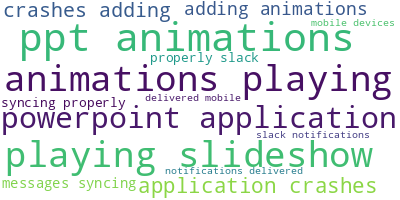

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['cleanDescription'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
#There are words in this word cloud which do not contribute a lot in narrowing down a relevant theme
# So lets add some of these words in the list of stopwords and clean the data again
more_stopwords = ['information', 'contact', 'us', 'found', 'assistance' ]
listStopwords.extend(more_stopwords)

#clean again
def stop_words(text):

  #stopwords
  text_wo_stopwords = [ p for p in text.split() if ( p not in listStopwords)]
  text_wo_stopwords = ' '.join(text_wo_stopwords)

  return text_wo_stopwords

# Apply clean function to the data
df['cleanDescription']= df['description'].apply(cleanData)
#create tokens of the cleaned data
df['tokens'] = df['cleanDescription'].apply(word_tokenize)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head(2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,number,ci,week_start_date,description,cleanDescription,tokens
0,INC3422521,ppt,2023-05-15,PPT animations are not playing during the slid...,ppt animations playing slideshow,"[ppt, animations, playing, slideshow]"
1,INC3422521,share point,2023-05-15,PowerPoint application crashes when adding ani...,powerpoint application crashes adding animations,"[powerpoint, application, crashes, adding, ani..."


USE GENSIM LIBRARY FOR APPLYING LDA TO THE DATASET

In [ ]:
from gensim import corpora
from gensim.models import LdaModel
from gensim import models

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a dictionary from the tokenized text
dictionary = corpora.Dictionary(df['tokens'])

# Create a corpus
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Train an LDA model on the corpus
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=8, passes=24)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Print the topics and associated words
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.063*"animations" + 0.063*"playing" + 0.063*"ppt" + 0.063*"slideshow" + 0.062*"slack" + 0.062*"mobile" + 0.062*"notifications" + 0.062*"devices" + 0.062*"delivered" + 0.062*"application"')
(1, '0.063*"animations" + 0.063*"crashes" + 0.063*"adding" + 0.063*"application" + 0.063*"powerpoint" + 0.063*"slack" + 0.063*"mobile" + 0.063*"notifications" + 0.063*"delivered" + 0.063*"devices"')
(2, '0.246*"syncing" + 0.246*"properly" + 0.246*"messages" + 0.246*"slack" + 0.001*"animations" + 0.001*"crashes" + 0.001*"slideshow" + 0.001*"playing" + 0.001*"powerpoint" + 0.001*"adding"')
(3, '0.247*"animations" + 0.247*"ppt" + 0.247*"slideshow" + 0.247*"playing" + 0.001*"crashes" + 0.001*"slack" + 0.001*"messages" + 0.001*"properly" + 0.001*"syncing" + 0.001*"adding"')
(4, '0.198*"powerpoint" + 0.198*"application" + 0.198*"adding" + 0.198*"crashes" + 0.198*"animations" + 0.001*"slack" + 0.001*"devices" + 0.001*"delivered" + 0.001*"notifications" + 0.001*"mobile"')
(5, '0.063*"animations" + 0.06

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
themes = {'Topic1': 'Animations not playing in ppt'
          , 'Topic2' : 'Notification error on slack mobile device'
          , 'Topic3': 'Messages not syncing properly in slack'
          ,'Topic4': 'Slideshow crashing in ppt'}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Evaluation Metrics of Topic Modelling with LDA

In [ ]:
perplexity = lda_model.log_perplexity(corpus)
print('Perplexity: ', perplexity)

Perplexity:  -2.4105224727777004


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Visualization of LDA Topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


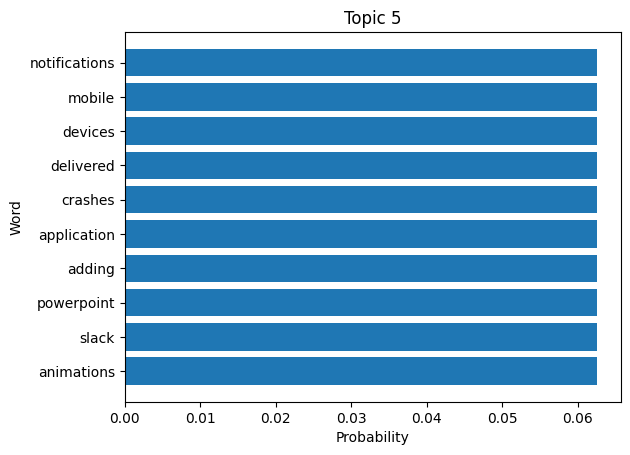

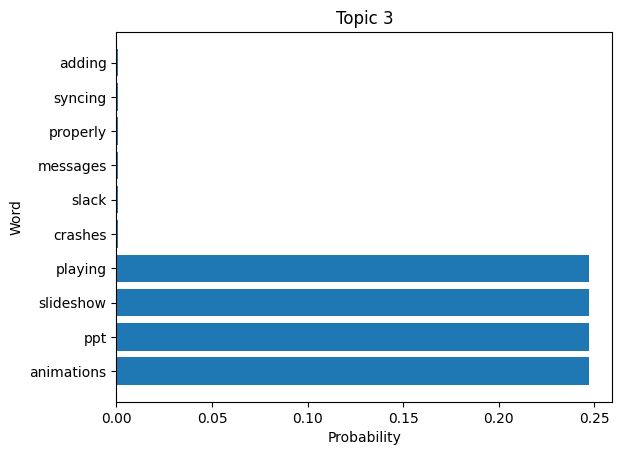

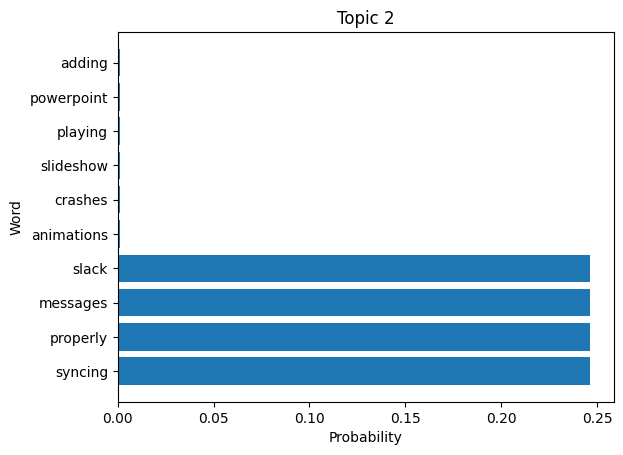

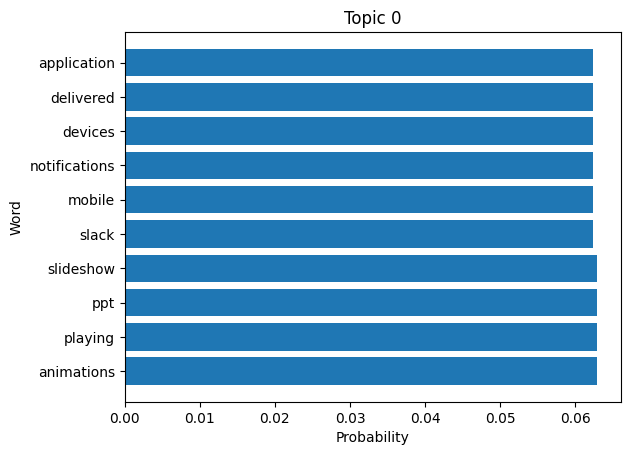

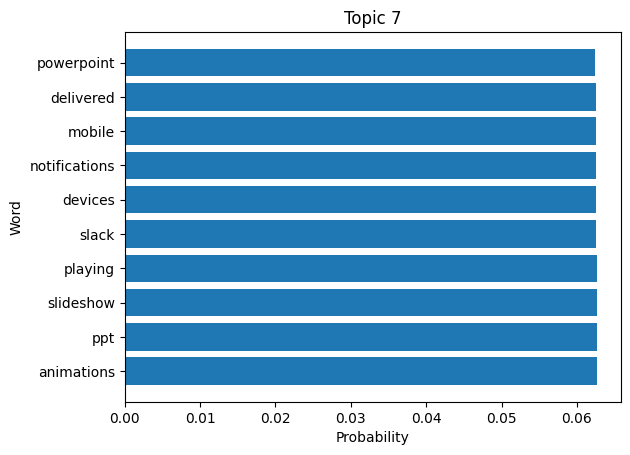

In [ ]:
import matplotlib.pyplot as plt

topics = lda_model.show_topics(num_topics=5, num_words=10, formatted=False)
for topic_id, topic in topics:
    words = [word for word, prob in topic]
    probs = [prob for word, prob in topic]
    plt.barh(words, probs)
    plt.title(f"Topic {topic_id}")
    plt.xlabel("Probability")
    plt.ylabel("Word")
    plt.show()


In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 19.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.0 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.13.0 

In [ ]:
# @title
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
pyLDAvis.display(vis)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


---------------------------------------------------------------------------